# Imports

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from scipy import stats

import warnings
warnings.filterwarnings("ignore")

### Gather data and EDA

In [3]:
df = pd.read_csv("marketing_AB.csv")

df.head()

,Unnamed: 0,user id,test group,converted,total ads,most ads day,most ads hour
0,0,1069124,ad,False,130,Monday,20
1,1,1119715,ad,False,93,Tuesday,22
2,2,1144181,ad,False,21,Tuesday,18
3,3,1435133,ad,False,355,Tuesday,10
4,4,1015700,ad,False,276,Friday,14


In [4]:
# Check for is user_id unique or not
df.duplicated(subset="user id").sum()

np.int64(0)

In [5]:
# Since user id is not duplicated we can remove with Unnamed Column
df.drop(['Unnamed: 0', 'user id'], axis=1, inplace=True)

df.head(2)

,test group,converted,total ads,most ads day,most ads hour
0,ad,False,130,Monday,20
1,ad,False,93,Tuesday,22


In [6]:
df.dtypes

test group       object
converted          bool
total ads         int64
most ads day     object
most ads hour     int64
dtype: object

In [7]:
df.isna().sum()

test group       0
converted        0
total ads        0
most ads day     0
most ads hour    0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 588101 entries, 0 to 588100
Data columns (total 5 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   test group     588101 non-null  object
 1   converted      588101 non-null  bool  
 2   total ads      588101 non-null  int64 
 3   most ads day   588101 non-null  object
 4   most ads hour  588101 non-null  int64 
dtypes: bool(1), int64(2), object(2)
memory usage: 18.5+ MB


In [9]:
# most ads hour represanting the which hour add published so we can count as category too
# Check if the categorical variables have appropriate number of levels 

df_cat = df[['test group', 'converted', 'most ads day', 'most ads hour']]
df_cat.nunique()

test group        2
converted         2
most ads day      7
most ads hour    24
dtype: int64

In [10]:
# Check categorical variables have appropriate levels
for i in df_cat.columns:
    print(i.upper(), ":", df_cat[i].unique())

TEST GROUP : ['ad' 'psa']
CONVERTED : [False  True]
MOST ADS DAY : ['Monday' 'Tuesday' 'Friday' 'Saturday' 'Wednesday' 'Sunday' 'Thursday']
MOST ADS HOUR : [20 22 18 10 14 13 19 11 12 16 21  3 23  4  8  0  2 15  1  6 17  7  9  5]


### Univariate Analysis

Let's graph each feature one by one

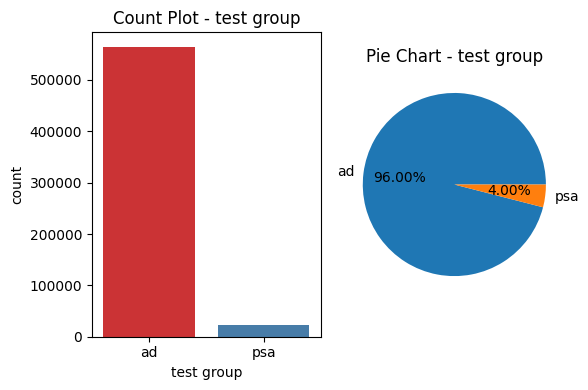

In [15]:
variable = 'test group'

plt.figure(figsize=(6,4))
#Count Plot
plt.subplot(1,2,1)
sns.countplot(x=variable, data=df_cat, palette='Set1')
plt.title(f'Count Plot - {variable}')

#Pie Chart
plt.subplot(1,2,2)
counts = df_cat[variable].value_counts()
plt.pie(counts, labels=counts.index, autopct='%0.2f%%')
plt.title(f'Pie Chart - {variable}')

plt.tight_layout()
plt.show()

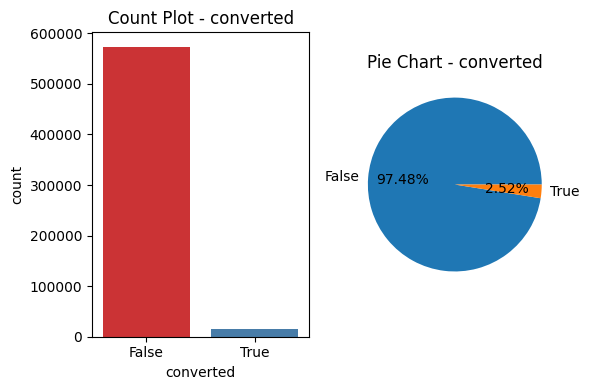

In [14]:
variable = 'converted'

plt.figure(figsize=(6,4))
#Count Plot
plt.subplot(1,2,1)
sns.countplot(x=variable, data=df_cat, palette='Set1')
plt.title(f'Count Plot - {variable}')

#Pie Chart
plt.subplot(1,2,2)
counts = df_cat[variable].value_counts()
plt.pie(counts, labels=counts.index, autopct='%0.2f%%')
plt.title(f'Pie Chart - {variable}')

plt.tight_layout()
plt.show()

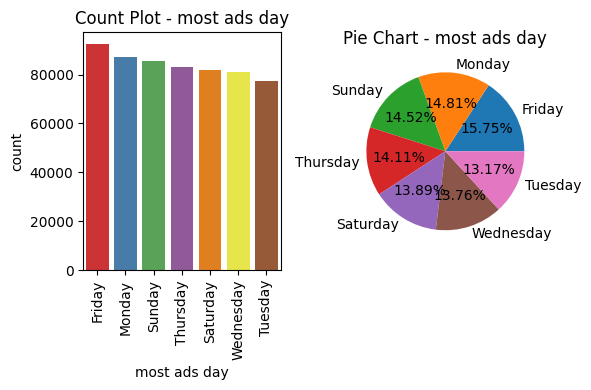

In [19]:
variable = 'most ads day'

plt.figure(figsize=(6,4))
#Count Plot
plt.subplot(1,2,1)
sns.countplot(x=variable, data=df_cat, order=df_cat['most ads day'].value_counts().index, palette='Set1')
plt.title(f'Count Plot - {variable}')
plt.xticks(rotation=90)

#Pie Chart
plt.subplot(1,2,2)
counts = df_cat[variable].value_counts()
plt.pie(counts, labels=counts.index, autopct='%0.2f%%')
plt.title(f'Pie Chart - {variable}')

plt.tight_layout()
plt.show()

Since there is too much variable in ads hour piechart will not be useful

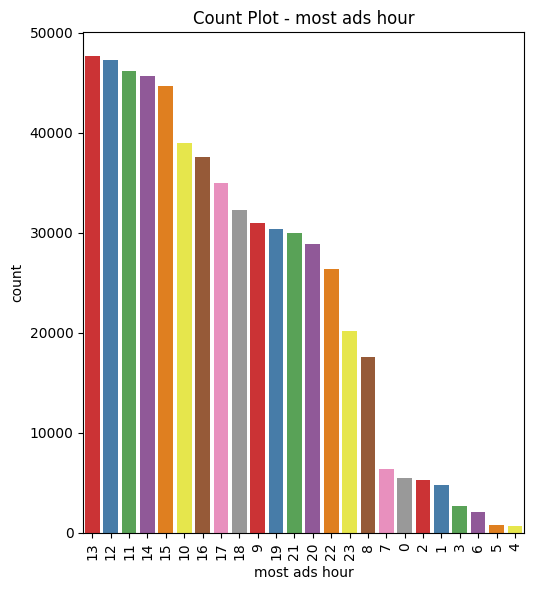

In [23]:
variable = 'most ads hour'

plt.figure(figsize=(10,6))
#Count Plot
plt.subplot(1,2,1)
sns.countplot(x=variable, data=df_cat, order=df_cat['most ads hour'].value_counts().index, palette='Set1')
plt.title(f'Count Plot - {variable}')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

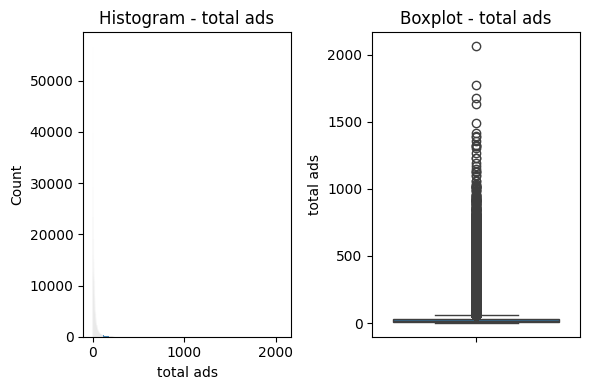

In [24]:
variable = 'total ads'

plt.figure(figsize=(6,4))
#Count Plot
plt.subplot(1,2,1)
sns.histplot(x=variable, data=df)
plt.title(f'Histogram - {variable}')

#Box Chart
plt.subplot(1,2,2)
sns.boxplot(y= variable, data=df)
plt.title(f'Boxplot - {variable}')

plt.tight_layout()
plt.show()

In [25]:
df['total ads'].describe()

count    588101.000000
mean         24.820876
std          43.715181
min           1.000000
25%           4.000000
50%          13.000000
75%          27.000000
max        2065.000000
Name: total ads, dtype: float64

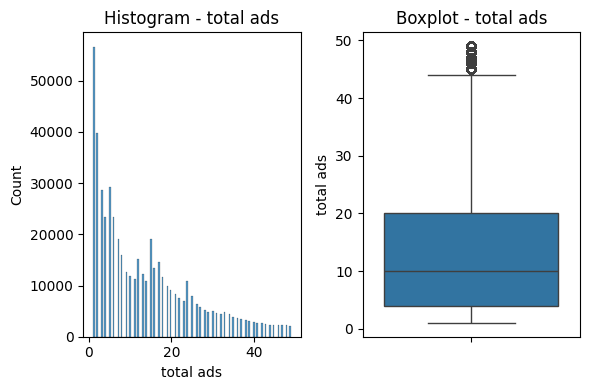

In [26]:
# Most of the adds are less than 50, lets draw with filtering
variable = 'total ads'

plt.figure(figsize=(6,4))
#Count Plot
plt.subplot(1,2,1)
sns.histplot(x=variable, data=df[df['total ads'] < 50])
plt.title(f'Histogram - {variable}')

#Box Chart
plt.subplot(1,2,2)
sns.boxplot(y= variable, data=df[df['total ads'] < 50])
plt.title(f'Boxplot - {variable}')

plt.tight_layout()
plt.show()

### Statistical Analysis

In [29]:
df['converted'] = df['converted'].astype(int)
df.dtypes

test group       object
converted         int64
total ads         int64
most ads day     object
most ads hour     int64
dtype: object

In [33]:
# Test Group Analysis

control_group = df[df['test group'] == 'psa']
test_group = df[df['test group'] == 'ad']

t_stat, p_val = stats.ttest_ind(test_group['converted'], control_group['converted'])
print(f'Test Group Analysis - T-Statistics: {t_stat}, P-Value: {p_val}')

Test Group Analysis - T-Statistics: 7.37040597428566, P-Value: 1.7033052627831264e-13


- T-statistic 7.37 suggest that there is a notable difference between the conversion rates of the two group
- P-Value is extremelly small difference in conversion rates between 'ad' and 'psa' is statistically significant

In [34]:
if p_val < 0.05:
    print("Reject the null hypothesis: There is a significant difference in conversion rates between the 'ad' and 'psa' groups.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in conversion rates between the 'ad' and 'psa' groups.")

Reject the null hypothesis: There is a significant difference in conversion rates between the 'ad' and 'psa' groups.


In [36]:
# Ads Day Analysis 

results_day = stats.f_oneway(
    df[df['most ads day'] == 'Monday']['converted'],
    df[df['most ads day'] == 'Tuesday']['converted'],
    df[df['most ads day'] == 'Wednesday']['converted'],
    df[df['most ads day'] == 'Thursday']['converted'],
    df[df['most ads day'] == 'Friday']['converted'],
    df[df['most ads day'] == 'Saturday']['converted'],
    df[df['most ads day'] == 'Sunday']['converted']
)

print(f'Most Ads Day Analysis F-Statistic: {results_day.statistic},P-Value: {results_day.pvalue}')

Most Ads Day Analysis F-Statistic: 68.38818386898062,P-Value: 1.8032007655359558e-85


- F-Statistic: The F-statistic of approximately 68.39 is quite high, indicating that there is a large variation in ad performance between different days.

- P-Value: The P-value of 1.80e-85 is extremely small, suggesting that the differences in ad performance across different days are highly statistically significant.

In [39]:
if results_day.pvalue < 0.05:
    print("Reject the null hypothesis: The day with the most ads seen significantly affects the conversion rate.")
else:
    print("Fail to reject the null hypothesis: The day with the most ads seen does not significantly affect conversion rates.")

Reject the null hypothesis: The day with the most ads seen significantly affects the conversion rate.


In [41]:
# Ads Hour Analysis
result_hour = stats.f_oneway(
    df[df['most ads hour'] == 0]['converted'],
    df[df['most ads hour'] == 1]['converted'],
    df[df['most ads hour'] == 2]['converted'],
    df[df['most ads hour'] == 3]['converted'],
    df[df['most ads hour'] == 4]['converted'],
    df[df['most ads hour'] == 5]['converted'],
    df[df['most ads hour'] == 6]['converted'],
    df[df['most ads hour'] == 7]['converted'],
    df[df['most ads hour'] == 8]['converted'],
    df[df['most ads hour'] == 9]['converted'],
    df[df['most ads hour'] == 10]['converted'],
    df[df['most ads hour'] == 11]['converted'],
    df[df['most ads hour'] == 12]['converted'],
    df[df['most ads hour'] == 13]['converted'],
    df[df['most ads hour'] == 14]['converted'],
    df[df['most ads hour'] == 15]['converted'],
    df[df['most ads hour'] == 16]['converted'],
    df[df['most ads hour'] == 17]['converted'],
    df[df['most ads hour'] == 18]['converted'],
    df[df['most ads hour'] == 19]['converted'],
    df[df['most ads hour'] == 20]['converted'],
    df[df['most ads hour'] == 21]['converted'],
    df[df['most ads hour'] == 22]['converted'],
    df[df['most ads hour'] == 23]['converted']
)
print(f"Most Ads Hour Analysis - F-statistic: {result_hour.statistic}, P-value: {result_hour.pvalue}")

Most Ads Hour Analysis - F-statistic: 18.742037312974496, P-value: 7.482025334833055e-77


- F-Statistic: The F-statistic of approximately 18.74 indicates that there are significant differences in ad performance across different hours of the day.

- P-Value: The extremely small P-value (7.48e-77) suggests that these differences are highly statistically significant, meaning it's very unlikely that the observed differences are due to random chance.

In [43]:
if result_hour.pvalue < 0.05:
    print("Reject the null hypothesis: The hour with the most ads seen significantly affects the conversion rate.")
else:
    print("Fail to reject the null hypothesis: The hour with the most ads seen does not significantly affect conversion rates.")

Reject the null hypothesis: The hour with the most ads seen significantly affects the conversion rate.


In [44]:
# Total Adds Analysis

df_subset = df[df['total ads'] < 50].copy()

#Create bins for total ads
df_subset.loc[:,'total_ads_bin'] = pd.cut(df_subset['total ads'], bins=[-1, 1, 5, 10, 20, 30, 40, 50],
                                          labels=['0-1','2-5','6-10','11-20','21-30','31-40','41-50'])

# Perform ANOVA on binned data
result_bin = stats.f_oneway(
    df_subset[df_subset['total_ads_bin'] == '0-1']['converted'],
    df_subset[df_subset['total_ads_bin'] == '2-5']['converted'],
    df_subset[df_subset['total_ads_bin'] == '6-10']['converted'],
    df_subset[df_subset['total_ads_bin'] == '11-20']['converted'],
    df_subset[df_subset['total_ads_bin'] == '21-30']['converted'],
    df_subset[df_subset['total_ads_bin'] == '31-40']['converted'],
    df_subset[df_subset['total_ads_bin'] == '41-50']['converted']
)

print(f"Total Ads (Binned) Analysis - F-statistic: {result_bin.statistic}, P-value: {result_bin.pvalue}")

Total Ads (Binned) Analysis - F-statistic: 1245.6689124986833, P-value: 0.0


- F-Statistic: The extraordinarily high F-statistic of approximately 1245.67 suggests that there are very large differences in ad performance between the different bins of total ads shown.

- P-Value: A P-value of 0.0 indicates that these differences are statistically significant to an extreme degree. It is highly unlikely that these differences are due to chance.

In [46]:
if result_bin.pvalue < 0.05:
    print("Reject the null hypothesis: There is a significant difference in conversion rates among different levels of total ads seen (binned).")
else:
    print("Fail to reject the null hypothesis: The number of ads seen (binned) does not significantly affect conversion rates.")

Reject the null hypothesis: There is a significant difference in conversion rates among different levels of total ads seen (binned).


#### Visualize Conversion Rates for Each Group

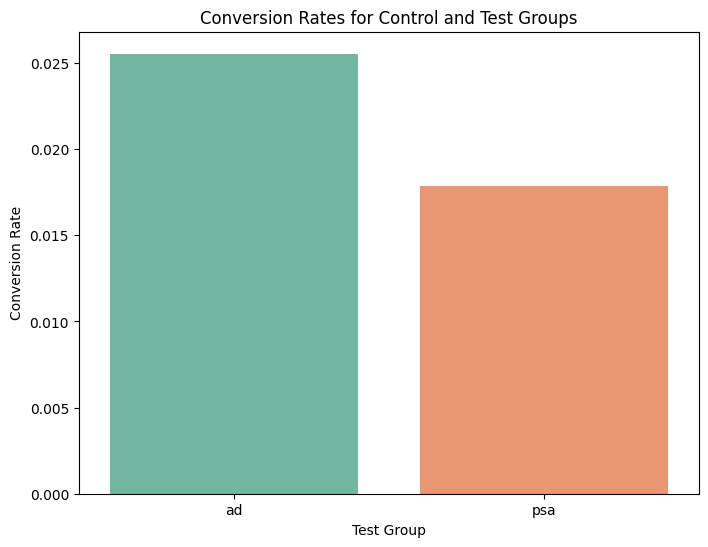

In [49]:
# Conversion Rates for Test Group
conversion_rates = df.groupby('test group')['converted'].mean().reset_index()
conversion_rates.columns = ['Test Group', 'Conversion Rate']
plt.figure(figsize=(8,6))
sns.barplot(x='Test Group', y='Conversion Rate', data=conversion_rates, palette='Set2')
plt.title('Conversion Rates for Control and Test Groups')
plt.xlabel('Test Group')
plt.ylabel('Conversion Rate')
plt.show()

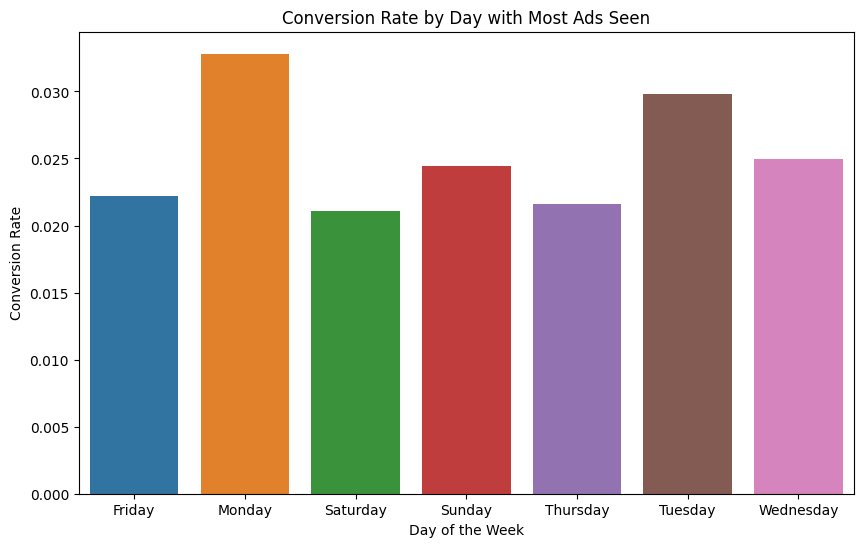

In [51]:
#Conversion Rate by Day
day_conversion_rate = df.groupby('most ads day')['converted'].mean().reset_index()
plt.figure(figsize=(10,6))
sns.barplot(data=day_conversion_rate, x='most ads day', y='converted', palette='tab10')
plt.title('Conversion Rate by Day with Most Ads Seen')
plt.xlabel('Day of the Week')
plt.ylabel('Conversion Rate')
plt.show()

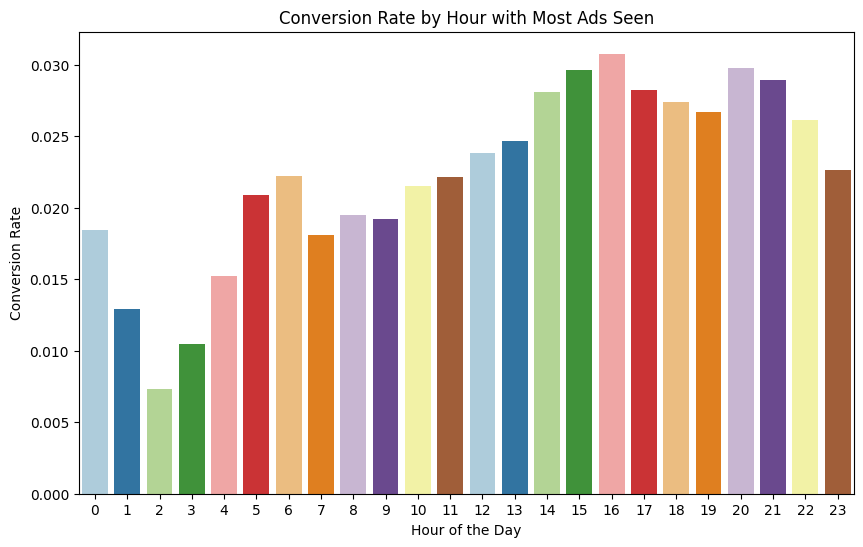

In [52]:
#Conversion Rate Hour
hour_conversion_rate = df.groupby('most ads hour')['converted'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(data=hour_conversion_rate, x='most ads hour', y='converted', palette='Paired')
plt.title('Conversion Rate by Hour with Most Ads Seen')
plt.xlabel('Hour of the Day')
plt.ylabel('Conversion Rate')
plt.show()

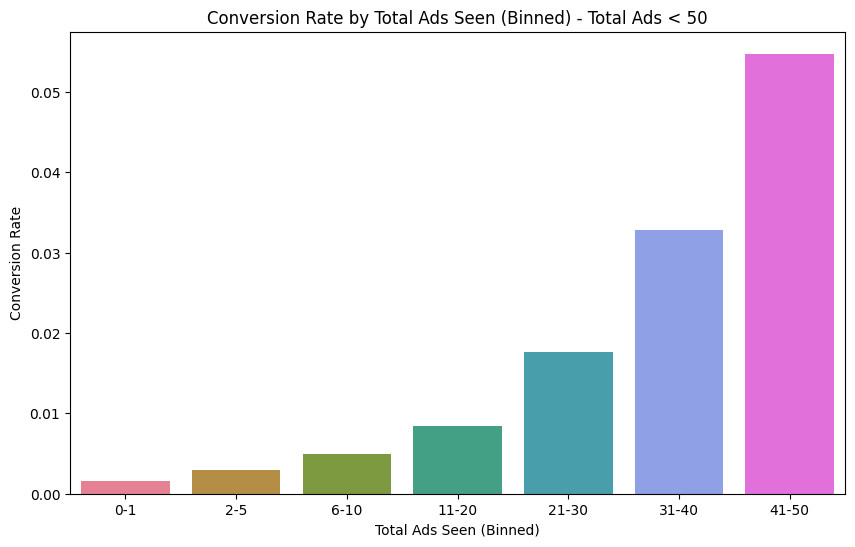

In [54]:
#Conversion Rate by Total Ads
ads_conversion_rate_bin = df_subset.groupby('total_ads_bin')['converted'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(data=ads_conversion_rate_bin, x='total_ads_bin', y='converted', palette='husl')
plt.title('Conversion Rate by Total Ads Seen (Binned) - Total Ads < 50')
plt.xlabel('Total Ads Seen (Binned)')
plt.ylabel('Conversion Rate')
plt.show()